# Dipam

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import pi

In [2]:
#gathering data
data=pd.read_csv('Student Gradebook - August.csv')

In [3]:
data.head()

,id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner
0,<<<<<<< HEAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,AjKyaUkhada,2019-08-01 13:26:57,Ritual,Consistency,Sonali,0.0,2.0,2.0,0.0
2,0,AjKyaUkhada,2019-08-01 14:40:42,Ritual,Consistency,Chandrima,0.0,2.0,2.0,0.0
3,0,AjKyaUkhada,2019-08-01 14:44:34,Ritual,Consistency,Purbita,0.0,2.0,2.0,0.0
4,0,AjKyaUkhada,2019-08-01 14:47:05,Ritual,Consistency,Kunal,0.0,2.0,2.0,0.0


In [4]:
data_august=data  #basically to understand that it is the dataset of august

In [5]:
data_august.shape   

(1493, 10)

In [6]:
data_july=pd.read_csv('Student Gradebook - July.csv')

In [7]:
data_july.head()

,id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,<<<<<<< HEAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Chandrima,0.0,6.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Dipam,0.0,7.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Durga,0.0,6.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Linkedin Profile create/update,7/22/2019,Profile Building,"Intent, Creativity,Content",Kaushal,0.0,7.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_july.columns

Index(['id', 'Task', 'Date', 'Module', 'Type', 'Student', 'Late Submission',
       'Points', 'Total', 'Task Winner', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [9]:
#data cleaning
data_july.drop(columns=['Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22'],inplace=True)

In [10]:
data_july.shape

(430, 10)

In [11]:
data_september=pd.read_csv('Student Gradebook - September.csv')

In [12]:
data_september.head()

,id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner
0,0,AjKyaUkhada,9/10/2019,Ritual,Consistency,Sonali,0,1.0,1,0
1,0,Knowledge Sharing,2019-09-10 1:27:50,Ritual,"Consistency,Curiosity",Prasoon,0,1.0,1,0
2,0,AjKyaUkhada,9/10/2019,Ritual,Consistency,Durga,0,1.0,1,0
3,0,AjKyaUkhada,9/10/2019,Ritual,Consistency,Purbita,0,1.0,1,0
4,0,AjKyaUkhada,9/10/2019,Ritual,Consistency,Ujjainee,0,1.0,1,0


In [13]:
data=pd.concat([data_july,data_august,data_september])

In [14]:
data.shape

(2225, 10)

In [15]:
data_august.shape

(1493, 10)

In [17]:
data_august.columns

Index(['id', 'Task', 'Date', 'Module', 'Type', 'Student', 'Late Submission',
       'Points', 'Total', 'Task Winner'],
      dtype='object')

In [18]:
data.fillna({'Student':'No Student'},inplace=True)
data.fillna({'Task':'No Task'},inplace=True)
data.fillna({'Date':'0'},inplace=True)
data.fillna({'Module':'No Module'},inplace=True)
data.fillna({'Type':'No Type'},inplace=True)
data.fillna({'Late Submission':'0'},inplace=True)
data.fillna({'Points':'0.0'},inplace=True)
data.fillna({'Total':'0'},inplace=True)
data.fillna({'Task Winner':'0'},inplace=True)
data.fillna({'id':'0'},inplace=True)

In [19]:
data.columns

Index(['id', 'Task', 'Date', 'Module', 'Type', 'Student', 'Late Submission',
       'Points', 'Total', 'Task Winner'],
      dtype='object')

In [20]:
data['Points']=data['Points'].astype(float)

In [21]:
data=data.drop(0)
data=data.drop([299,429,1492])
data=data.drop([151,376,912])
data=data.drop([316])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 1 to 301
Data columns (total 10 columns):
id                 2208 non-null object
Task               2208 non-null object
Date               2208 non-null object
Module             2208 non-null object
Type               2208 non-null object
Student            2208 non-null object
Late Submission    2208 non-null object
Points             2208 non-null float64
Total              2208 non-null object
Task Winner        2208 non-null object
dtypes: float64(1), object(9)
memory usage: 189.8+ KB


In [23]:
a=data['Task'].value_counts().index
highest=[]
for i in a:
    highest.append(max(data[data['Task']==i]['Points']))

In [25]:
data_highest_table = {'Task':a, 'Highest':highest} 
data_high=pd.DataFrame(data_highest_table)
data=data.merge(data_high, on='Task')

# creating a function where we have entered the name of the student 

In [27]:
def student(name):
    data_tasks=data
    data_student=data_tasks[data_tasks['Student']==name] 
    print("THE NAME OF THE STUDENT: ",name)
    x=data_student['Total'].sum()
    print("TOTAL MARKS OF THE TASKS: ",x)
    y=data_student['Points'].sum()
    print("THE MARKS OBTAINED BY THE STUDENT: ",y)
    average=(y/x)*100
    print("THE PERCENTAGE: ",average,"%")
    if(average>=90):
        print("GRADE: 0 (OUTSTANDING)")
    elif(average>=80):
        print("GRADE: E (EXCELLENT)")
    elif(average>=70):
        print("GARDE: A++ (VERY GOOD)")
    elif(average>=60):
        print("GRADE: A (GOOD)")
    elif(average)>=50:
        print("GRADE: B (FAIR)")
    elif(average>=40):
        print("GARDE: C (SATISFACTORY)")
    elif(average>=30):
        print("GARDE: D (TRY TO IMPROVE)")
    else:
        print("GRADE: F (FAIL)")
    m=len(data_student[data_student['Task Winner']==1])
    print("TASK WINNER: ",m,"times")
    data_profile=data_student[data_student['Module']=='Profile Building']
    data_profile_marks=(data_profile['Points'].sum()/data_profile['Total'].sum())*100
    print("PROFILE BULIDING PERCENTILE: ",data_profile_marks,"%")
    data_consistency=data[data['id']==0]
    data_consistency_student=data_consistency[data_consistency['Student']==name]
    a=len(data_consistency[data_consistency['Student']==name])
    b=len(data_consistency_student[data_consistency_student['Task']=='Knowledge Sharing'])
    knowledge=(b/a)*100
    print("KNOWLEDGE SHARING PERCENTILE: ",knowledge,"%")
    print("Result Analysis")
    x1=data_student.pivot_table(index='Module',values='Points',aggfunc='sum')
    y1=data_student.pivot_table(index='Module',values='Total',aggfunc='sum')
    w1=data_student.pivot_table(index='Module',values='Highest',aggfunc='sum')
    z1=pd.concat([x1,y1,w1],axis=1)
    subject_percentile=[x1['Points']/y1['Total']*100]
    z1['Percentile']=" "
    for i in range(len(z1)):
        z1['Percentile'][i]=subject_percentile[0][i]
    print(z1)

In [28]:
student('Shakib')

THE NAME OF THE STUDENT:  Shakib
TOTAL MARKS OF THE TASKS:  612.0
THE MARKS OBTAINED BY THE STUDENT:  555.0
THE PERCENTAGE:  90.68627450980392 %
GRADE: 0 (OUTSTANDING)
TASK WINNER:  6 times
PROFILE BULIDING PERCENTILE:  86.94444444444444 %
KNOWLEDGE SHARING PERCENTILE:  16.666666666666664 %
Result Analysis
                              Points  Total  Highest Percentile
Module                                                         
Data Analytics                 141.5  155.0    152.0    91.2903
Introduction to Data Science    55.0   75.0     64.0    73.3333
Machine Learning                10.0   10.0     10.0        100
Profile Building               156.5  180.0    171.5    86.9444
Ritual                         192.0  192.0    237.0        100


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
student('Dipam')

THE NAME OF THE STUDENT:  Dipam
TOTAL MARKS OF THE TASKS:  653.0
THE MARKS OBTAINED BY THE STUDENT:  568.5
THE PERCENTAGE:  87.05972434915773 %
GRADE: E (EXCELLENT)
TASK WINNER:  2 times
PROFILE BULIDING PERCENTILE:  77.22222222222223 %
KNOWLEDGE SHARING PERCENTILE:  15.384615384615385 %
Result Analysis
                              Points  Total  Highest Percentile
Module                                                         
Data Analytics                 138.0  155.0    152.0    89.0323
Introduction to Data Science    48.5   75.0     64.0    64.6667
Machine Learning                10.0   10.0     10.0        100
Profile Building               139.0  180.0    171.5    77.2222
Ritual                         233.0  233.0    312.0        100


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
data_dipam_full=data[data['Student']=='Dipam']

In [32]:
a=data_dipam_full['Module'].value_counts().index.tolist()

In [33]:
x=data_dipam_full.pivot_table(index='Module',values='Points',aggfunc='sum')

In [34]:
y=data_dipam_full.pivot_table(index='Module',values='Total',aggfunc='sum')

In [43]:
w=data_dipam_full.pivot_table(index='Module',values='Highest',aggfunc='sum')

In [44]:
z=pd.concat([x,y,w],axis=1)

In [45]:
subject_percentile=[x['Points']/y['Total']*100]

In [46]:
subject_percentile[0][1]

64.66666666666666

In [47]:
z['Percentile']=" "
for i in range(len(z)):
    z['Percentile'][i]=subject_percentile[0][i]

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
z

,Points,Total,Highest,Percentile
Module,,,,
Data Analytics,138.0,155.0,152.0,89.0323
Introduction to Data Science,48.5,75.0,64.0,64.6667
Machine Learning,10.0,10.0,10.0,100
Profile Building,139.0,180.0,171.5,77.2222
Ritual,233.0,233.0,312.0,100


In [49]:
z.to_html('z.html')

In [50]:
from datetime import datetime
from datetime import date
from datetime import time

In [30]:
student('Kunal')

THE NAME OF THE STUDENT:  Kunal
TOTAL MARKS OF THE TASKS:  592.0
THE MARKS OBTAINED BY THE STUDENT:  553.0
THE PERCENTAGE:  93.41216216216216 %
GRADE: 0 (OUTSTANDING)
TASK WINNER:  4 times
PROFILE BULIDING PERCENTILE:  90.3125 %
KNOWLEDGE SHARING PERCENTILE:  0.0 %
Result Analysis
                              Points  Total  Highest Percentile
Module                                                         
Data Analytics                 143.0  155.0    152.0    92.2581
Introduction to Data Science    63.5   75.0     64.0    84.6667
Machine Learning                10.0   10.0     10.0        100
Profile Building               144.5  160.0    152.5    90.3125
Ritual                         192.0  192.0    227.0        100


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [52]:
user=pd.read_csv('users - users.csv')

In [53]:
def user_info(student):
    data=user[user['fname']==student]
    print("EMAIL: ",data['email'])
    print("COLLEGE: ",data['college'])
    print("STREAM: ",data['branch'])
    print("GITHUB LINK: ",data['github'])

In [54]:
user_info('Dipam')

EMAIL:  5    dipamhazra1999@gmail.com
Name: email, dtype: object
COLLEGE:  5    St. Thomas' College of Engineering and Technology
Name: college, dtype: object
STREAM:  5    CSE
Name: branch, dtype: object
GITHUB LINK:  5    https://github.com/DIPAM9
Name: github, dtype: object


In [55]:
user.head()

,user_id,batch_id,fname,lname,email,password,dp,college,passing_year,branch,github,medium,portfolio,linkedin
0,1,1,Durga,Agarwal,durgaa219@gmail.com,NaN,avatar.jpg,"UEM, Kolkata",2021,CSE,https://github.com/durgaag,https://medium.com/@durgaa219,https://sites.google.com/view/durgaag-portfoli...,https://www.linkedin.com/in/durga-agarwal-5282...
1,2,1,Sharika,Anjum Mondal,sharikaanjumm@gmail.com,NaN,avatar.jpg,"Amity University, Kolkata",2022,ECE,https://github.com/sharika-anjum,https://medium.com/@sharikaanjumm,https://sites.google.com/view/sharikas-portfolio,https://www.linkedin.com/in/sharika-anjum-mond...
2,3,1,Swaastick,Singh,meightpc@gmail.com,NaN,avatar.jpg,"Amity University, Kolkata",2022,CSE,https://github.com/mightomi,https://medium.com/@meightpc_14421,https://sites.google.com/view/meight/home,https://www.linkedin.com/in/swaastick/
3,4,1,Apurwa,Arya,aryaapurwa08@gmail.com,NaN,avatar.jpg,"UEM, Kolkata",2021,CSE,https://github.com/aryaapurwa08,https://medium.com/@aryaapurwa08,https://sites.google.com/view/apurwaaryaeportf...,https://www.linkedin.com/in/apurwa-arya-2b9988157
4,5,1,Purbita,Sur,purbita1998@gmail.com,NaN,avatar.jpg,"Amity University, Kolkata",2021,CSE,https://github.com/purbita-sur,https://medium.com/@purbita1998,https://sites.google.com/view/purbitasur/home,https://www.linkedin.com/in/purbita-sur


In [57]:
df=pd.read_html('z.html')

In [58]:
df[0].values.tolist()

[['Data Analytics', 138.0, 155.0, 152.0, 89.0323],
 ['Introduction to Data Science', 48.5, 75.0, 64.0, 64.6667],
 ['Machine Learning', 10.0, 10.0, 10.0, 100.0],
 ['Profile Building', 139.0, 180.0, 171.5, 77.2222],
 ['Ritual', 233.0, 233.0, 312.0, 100.0]]

# creaating the class

In [59]:
class info_of_student():
   def student(name):
    data_tasks=data
    data_student=data_tasks[data_tasks['Student']==name] 
    name=name
    college=user[user['fname']==student]['college']
    branch=user[user['fname']==student]['branch']
    Date=str(today.strftime("%d/%m/%Y"))
    Number_of_task_wins=str(len(data_student[data_student['Task Winner']==1]))
    total_marks=data_student['Total'].sum()
    obtained_marks=data_student['Points'].sum()
    average=(obtaied_marks/total_marks)*100
    data_profile=data_student[data_student['Module']=='Profile Building']
    data_profile_marks=(data_profile['Points'].sum()/data_profile['Total'].sum())*100
    profile_building_percentile=data_profile_marks
    data_consistency=data[data['id']==0]
    data_consistency_student=data_consistency[data_consistency['Student']==name]
    a=len(data_consistency[data_consistency['Student']==name])
    b=len(data_consistency_student[data_consistency_student['Task']=='Knowledge Sharing'])
    knowledge=(b/a)*100
    knowledge_sharing_percentile=knowledge
    x1=data_student.pivot_table(index='Module',values='Points',aggfunc='sum')
    y1=data_student.pivot_table(index='Module',values='Total',aggfunc='sum')
    w1=data_student.pivot_table(index='Module',values='Highest',aggfunc='sum')
    z1=pd.concat([x1,y1,w1],axis=1)
    subject_percentile=[x1['Points']/y1['Total']*100]
    z1['Percentile']=" "
    for i in range(len(z1)):
        z1['Percentile'][i]=subject_percentile[0][i]
    z1.to_html('z_total.html')
    df=pd.read_html('z_total.html')
    Table_elements=df[0].values.tolist()

In [60]:
data_september[data_september['Student']=='Dipam'].head()

,id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner
8,0,AjKyaUkhada,9/10/2019,Ritual,Consistency,Dipam,0,1.0,1,0
24,12,Web Scraping,9/11/2019,Data Analytics,"Knowledge,Patience",Dipam,1,10.0,10,1
43,0,AjKyaUkhada,2019-09-11 16:06:50,Ritual,Consistency,Dipam,0,1.0,1,0
58,0,Knowledge Sharing,2019-09-12 1:27:50,Ritual,"Consistency,Curiosity",Dipam,0,1.0,1,0
64,0,AjKyaUkhada,2019-09-12 15:45:30,Ritual,Consistency,Dipam,0,1.0,1,0


In [61]:
m=data_september.groupby('Student')['Points'].sum().sort_values(ascending=False)

In [62]:
n=data.groupby('Student')['Points'].sum().sort_values(ascending=False)

In [64]:
data_dipam_full['Points'].sum()

568.5

In [65]:
data_september[data_september['Student']=='Dipam']['Points'].sum()

105.0

In [78]:
a1

Index(['AjKyaUkhada', 'Knowledge Sharing', 'Start/Country Dataset',
       'Web Scraping', 'Data from API', 'Batsman V Bowler',
       'Blog on Data Analysis Process', 'Github Profile Creation',
       'Video Resume', 'Blog on Different data based job roles',
       'Online Resume'],
      dtype='object')

In [80]:
a1=data_september['Task'].value_counts().index
highest_september=[]
for i in a1:
    highest_september.append(max(data_september[data_september['Task']==i]['Points']))
data_highest_table_september = {'Task':a1, 'Highest':highest_september} 
data_high_september=pd.DataFrame(data_highest_table_september)
data_september=data_september.merge(data_high_september, on='Task')

In [81]:
data_dipam_full_sep=data_september[data_september['Student']=='Dipam']
x1=data_dipam_full_sep.pivot_table(index='Module',values='Points',aggfunc='sum')
y1=data_dipam_full_sep.pivot_table(index='Module',values='Total',aggfunc='sum')
w1=data_dipam_full_sep.pivot_table(index='Module',values='Highest',aggfunc='sum')
z1=pd.concat([x1,y1,w1],axis=1)
subject_percentile=[x1['Points']/y1['Total']*100]
z1['Percentile']=" "
for i in range(len(z1)):
    z1['Percentile'][i]=subject_percentile[0][i]
z1

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Points,Total,Highest,Percentile
Module,,,,
Data Analytics,92.0,95,95.0,96.8421
Ritual,13.0,13,13.0,100


In [82]:
z1.rename(columns={'Points':'Points_month','Total':'Total_month','Percentile':'Percentile_month','Highest':'Highest_month'},inplace=True)

In [83]:
z_comparison=pd.concat([z,z1],axis=1)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# comparison of month vs total

In [84]:
z_comparison

,Points,Total,Highest,Percentile,Points_month,Total_month,Highest_month,Percentile_month
Data Analytics,138.0,155.0,152.0,89.0323,92.0,95.0,95.0,96.8421
Introduction to Data Science,48.5,75.0,64.0,64.6667,NaN,NaN,NaN,NaN
Machine Learning,10.0,10.0,10.0,100,NaN,NaN,NaN,NaN
Profile Building,139.0,180.0,171.5,77.2222,NaN,NaN,NaN,NaN
Ritual,233.0,233.0,312.0,100,13.0,13.0,13.0,100


In [85]:
list(z.index)

['Data Analytics',
 'Introduction to Data Science',
 'Machine Learning',
 'Profile Building',
 'Ritual']

In [86]:
labels=np.array(z.index)

In [87]:
labels

array(['Data Analytics', 'Introduction to Data Science',
       'Machine Learning', 'Profile Building', 'Ritual'], dtype=object)

In [89]:
points=[]
for i in range(len(z)):
    points.append(z.values[i][0])

stats=points

In [90]:
stats

[138.0, 48.5, 10.0, 139.0, 233.0]

In [91]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

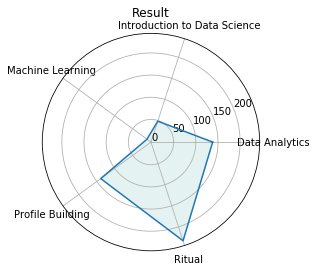

In [92]:
ax = plt.subplot(111, polar=True)

#Add the attribute labels to our axes
plt.xticks(angles[:-1],labels)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles,stats)

#Fill in the area plotted in the last line
ax.fill(angles, stats, 'teal', alpha=0.1)

#Give the plot a title and show it
ax.set_title("Result")
plt.show()

In [93]:
def plot(data):
    labels=np.array(data.index)
    stats=data.values
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1],labels)
    ax.plot(angles,stats)
    ax.fill(angles, stats, 'teal', alpha=0.1)
    ax.set_title("Result")
    plt.show()

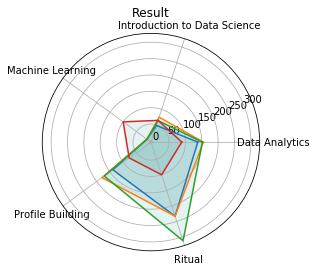

In [94]:
plot(z)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\projections\polar.py:63: RuntimeWarning: invalid value encountered in less
  mask = r < 0


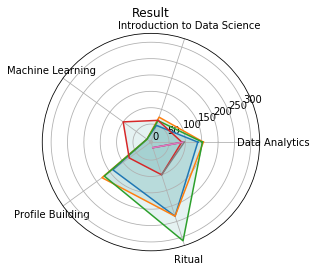

In [96]:
plot(z_comparison)

In [97]:
points=[]
for i in range(len(z_total)):
    points.append(z_total.values[i][0])

In [98]:
points

[138.0, 48.5, 10.0, 139.0, 233.0]

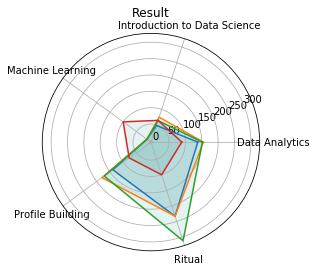

In [99]:
plot(z)

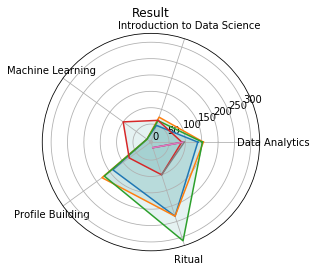

In [100]:
plot(z_comparison)